In [1]:
from __future__ import division
import hoomd
import hoomd.md
import numpy
import gsd
import gsd.hoomd
import ex_render
from matplotlib import pyplot
%matplotlib inline

In [ ]:
# Define a simulation context P_max = 10.0

sim1 = hoomd.context.initialize("");

# Create the snapshot

snapshot = hoomd.data.make_snapshot(N=1,
                                    box=hoomd.data.boxdim(Lx = 10.8, 
                                                          Ly = 1.2, 
                                                          Lz = 1.2),
                                    particle_types=['R']);

#Assign the positions of the chain

snapshot.particles.position[:] = [(0,0,0)];
snapshot.particles.orientation[:] = [[1, 0, 0, 0]];
snapshot.particles.moment_inertia[:] = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]];
snapshot.replicate(2,18,18);

#-----

system = hoomd.init.read_snapshot(snapshot);

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()

#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Define pressure as a value that varies over time.

pressure = hoomd.variant.linear_interp(points = [(0, 1.0), (1e4, 10.0)], zero = 'now')

#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = pressure);
hoomd.dump.gsd("trajectory1_NPT_snapshot.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output_NPT_snapshot.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

In [9]:
# Define a simulation context P_max = 15.0

sim2 = hoomd.context.initialize("");

# Create the snapshot

snapshot = hoomd.data.make_snapshot(N=1,
                                    box=hoomd.data.boxdim(Lx = 10.8, 
                                                          Ly = 1.2, 
                                                          Lz = 1.2),
                                    particle_types=['R']);

#Assign the positions of the chain

snapshot.particles.position[:] = [(0,0,0)];
snapshot.particles.orientation[:] = [[1, 0, 0, 0]];
snapshot.particles.moment_inertia[:] = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]];
snapshot.replicate(2,18,18);

#-----

system = hoomd.init.read_snapshot(snapshot);

system.particles.types.add('A');

#-----Define each rigid body type in the local coordinate system of the body.

rigid = hoomd.md.constrain.rigid();
rigid.set_param('R', 
                types=['A']*8,
                positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)]);

#-----Instruct the rigid constraint to create the constituent particles

rigid.create_bodies()

#-----Define the potential energy

nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

#-----Define pressure as a value that varies over time.

pressure = hoomd.variant.linear_interp(points = [(0, 1.0), (1e4, 15.0)], zero = 'now')

#-----Select an NPT integrator

hoomd.md.integrate.mode_standard(dt=0.005);
rigid = hoomd.group.rigid_center();
hoomd.md.integrate.npt(group = rigid, kT = 1.0, tau = 0.5, tauP = 1.0, P = pressure);
hoomd.dump.gsd("trajectory2_NPT_snapshot.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True);  

#-----Write output

log = hoomd.analyze.log(filename="log-output2_NPT_snapshot.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure'],
                         period=100,
                         overwrite=True);

notice(2): Group "all" created containing 648 particles
notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)
notice(2): Group "rigid_center" created containing 648 particles


In [ ]:
with sim1:
    hoomd.run(1e4)

In [10]:
with sim2:
    hoomd.run(1e4)

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:00:19 | Step 3050 / 10000 | TPS 304.931 | ETA 00:00:22
Time 00:00:29 | Step 5508 / 10000 | TPS 245.532 | ETA 00:00:18
Time 00:00:39 | Step 7898 / 10000 | TPS 238.934 | ETA 00:00:08
Time 00:00:49 | Step 10000 / 10000 | TPS 221.546 | ETA 00:00:00
Average TPS: 253.133
---------
-- Neighborlist stats:
1413 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 15 / n_neigh_avg: 6.61385
shortest rebuild period: 2
-- Cell list stats:
Dimension: 11, 11, 11
n_min    : 1 / n_max: 7 / n_avg: 4.38167
** run complete **


In [ ]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory1_NPT_snapshot.gsd');

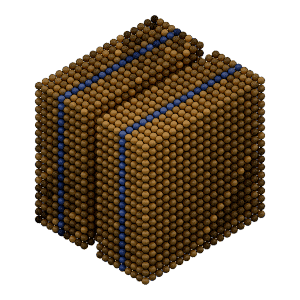

In [11]:
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory2_NPT_snapshot.gsd');

In [ ]:
data1 = numpy.genfromtxt(fname='log-output_NPT_snapshot.log', skip_header=True);
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

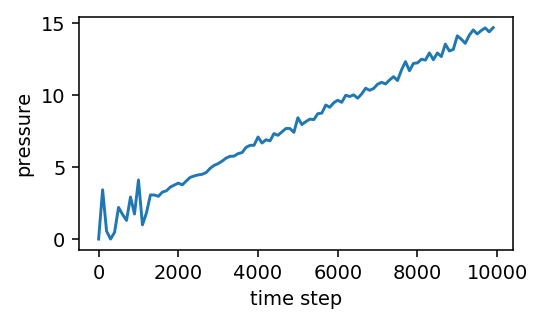

In [12]:
data2 = numpy.genfromtxt(fname='log-output2_NPT_snapshot.log', skip_header=True);
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data2[:,0], data2[:,10]);
pyplot.xlabel('time step');
pyplot.ylabel('pressure');

In [ ]:
t1 = gsd.hoomd.open('trajectory1_NPT_snapshot.gsd', 'rb');

In [ ]:
for f in t1:
    print(f.particles.orientation[0,:])

In [ ]:
for f in t1:
    print(f.particles.position[0,:])

In [ ]:
t2 = gsd.hoomd.open('trajectory2_NPT_snapshot.gsd', 'rb');

In [ ]:
for f in t2:
    print(f.particles.orientation[0,:])

In [ ]:
for f in t2:
    print(f.particles.position[0,:])